In [4]:
pip install GPy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 959.4/959.4 KB 12.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.3/71.3 KB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for GPy: filename=GPy-1.10.0-cp38-cp38-linux_x86_64.whl size=3424783 sha256=77e44f7bf20a028d338cba0351c085f643a1d8355554bdce6f1329827372521b
  Stored in directory: /root/.cache/pip/wheels/48/b3/22/31f07cfd7b182ea3703151b7e5a7d6447e3e1ac6aa5c529413
  Created wheel for paramz: filename=paramz-0.9.5-py3-none-any.whl size=102566 sha256=f0130c8a992c7278c5f29b00eec3aa53301577abff91be059432debeaa5442b2
  Stored in directory: /root/.cache/pip/wheels/66/78/6c/d98cb437834de5e29381786b4ba8a77ea68cca74653ab62713
Successfully built GPy paramz


In [47]:
pip install emukit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.5/170.5 KB 4.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 KB 4.9 MB/s eta 0:00:00
  Created wheel for emukit: filename=emukit-0.4.10-py3-none-any.whl size=257070 sha256=e12156a80a4b3aecbcef0893dae826547c01f6e05d30d1990bcd324cb043f2bd
  Stored in directory: /root/.cache/pip/wheels/9f/22/2f/daff2d230945e49b66d5bd44aa0860ee545d60f84823446cc1
Successfully built emukit


In [50]:
import GPy
import emukit.multi_fidelity
import emukit.test_functions
from emukit.model_wrappers.gpy_model_wrappers import GPyMultiOutputWrapper
from emukit.multi_fidelity.models import GPyLinearMultiFidelityModel
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
%matplotlib inline

In [51]:
from google.colab import drive
drive.mount('/content/drive')

DNS_data=pd.read_csv('/content/drive/MyDrive/ColabNotebooks/DNS_data.csv') 
RANS_data=pd.read_csv('/content/drive/MyDrive/ColabNotebooks/RANS_data.csv') 


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
# Generate sample data

x_train_l =  np.array([[70,100],[70,50],[70,0],[60,80],[60,30],[60,0],[50,80],[50,50],[40,100],[40,30],[40,0]])
x_train_h = np.array([[70,100],[70,0],[60,30],[50,50],[40,100],[40,0]])

DNS_full=DNS_data.dropna(axis=1)
DNS_full=DNS_full.values
DNS=DNS_full[:,[0,2,4,7,8,10]]

DNS_test=DNS_full[:,[1,5,3,8,6,9]]
RANS=RANS_data.dropna(axis=1)
RANS=RANS.values
#D_70_100=np.array(DNS_data['70_100'])
#D_70_100=D_70_100.reshape(-1,1)
#np.stack(())
#print(column_values.shape)

DNS_full=np.transpose(DNS_full)
y_train_h=np.transpose(DNS)
y_train_l=np.transpose(RANS)

In [67]:
x_train_l=np.c_[ x_train_l, np.zeros(len(x_train_l)) ]   
x_train_h=np.c_[ x_train_h, np.ones(len(x_train_h)) ]   
X_train=np.append(x_train_l,x_train_h,axis=0)
print(X_train)
Y_train=np.append(y_train_l,y_train_h,axis=0)


[[ 70. 100.   0.]
 [ 70.  50.   0.]
 [ 70.   0.   0.]
 [ 60.  80.   0.]
 [ 60.  30.   0.]
 [ 60.   0.   0.]
 [ 50.  80.   0.]
 [ 50.  50.   0.]
 [ 40. 100.   0.]
 [ 40.  30.   0.]
 [ 40.   0.   0.]
 [ 70. 100.   1.]
 [ 70.   0.   1.]
 [ 60.  30.   1.]
 [ 50.  50.   1.]
 [ 40. 100.   1.]
 [ 40.   0.   1.]]


In [68]:
kernels = [GPy.kern.RBF(2),GPy.kern.RBF(2)]
lin_mf_kernel = emukit.multi_fidelity.kernels.LinearMultiFidelityKernel(kernels)
gpy_lin_mf_model = GPyLinearMultiFidelityModel(X_train, Y_train, lin_mf_kernel, n_fidelities=2)
gpy_lin_mf_model.mixed_noise.Gaussian_noise.fix(0)
gpy_lin_mf_model.mixed_noise.Gaussian_noise_1.fix(0)

lin_mf_model =model=GPyMultiOutputWrapper(gpy_lin_mf_model, 4, n_optimization_restarts=200)

## Fit the model
  
lin_mf_model.optimize()

 /usr/local/lib/python3.8/dist-packages/paramz/transformations.py:111: RuntimeWarning:divide by zero encountered in log


Optimization restart 1/200, f = -24837.961137183567
Optimization restart 2/200, f = -24837.961137183214
Optimization restart 3/200, f = -24837.961137169084
Optimization restart 4/200, f = -24837.961137182414
Optimization restart 5/200, f = -24837.961136864436
Optimization restart 6/200, f = -24837.96113718343
Optimization restart 7/200, f = -24837.961137167014
Optimization restart 8/200, f = -30340.26516926372
Optimization restart 9/200, f = -24837.961136952672
Optimization restart 10/200, f = -24837.961137181203
Optimization restart 11/200, f = -24837.961137183043
Optimization restart 12/200, f = -24837.961137182414
Optimization restart 13/200, f = -24837.961137182443
Optimization restart 14/200, f = -24837.961137183545
Optimization restart 15/200, f = -24837.96113698172
Optimization restart 16/200, f = -24837.961137497176
Optimization restart 17/200, f = -24837.961137182894
Optimization restart 18/200, f = -24837.96113717492
Optimization restart 19/200, f = -24837.96113717622
Optimiz

In [58]:
#x_plot=np.reshape(x,[10000,2])
x_plot=np.array([[70,50],[60,0],[60,80],[40,100],[50,80],[40,30]])
X_plot_l=np.c_[ x_plot, np.zeros(len(x_plot)) ]   
X_plot_h=np.c_[ x_plot, np.ones(len(x_plot)) ]  

In [59]:
hf_mean_lin_mf_model, hf_var_lin_mf_model = lin_mf_model.predict(X_plot_h)

In [61]:
print(hf_mean_lin_mf_model.shape)

(6, 533)


Text(0, 0.5, 'Y')

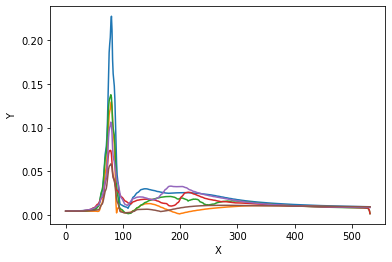

In [65]:
fig,ax=plt.subplots()
for i in range(hf_mean_lin_mf_model.shape[0]):
   ax.plot(hf_mean_lin_mf_model[i])
ax.set_xlabel('X')
ax.set_ylabel('Y')


Text(0, 0.5, 'Y')

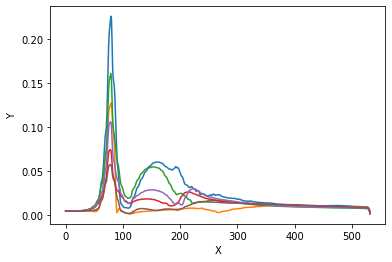

In [73]:
DNS_test=np.transpose(DNS_test)
fig,ax=plt.subplots()
for i in range(DNS_test.shape[0]):
   ax.plot(DNS_test[i])
ax.set_xlabel('X')
ax.set_ylabel('Y')


Text(0, 0.5, 'Y')

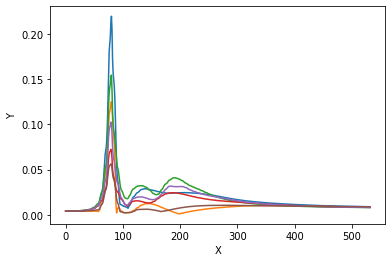

In [75]:
RANS_test=RANS[:,[1,5,3,8,6,9]]
RANS_test=np.transpose(RANS_test)
fig,ax=plt.subplots()
for i in range(RANS_test.shape[0]):
   ax.plot(RANS_test[i])
ax.set_xlabel('X')
ax.set_ylabel('Y')

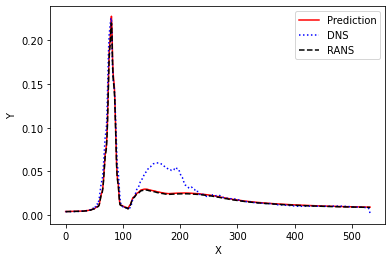

In [88]:

fig,ax=plt.subplots()
#DNS_test.shape[0]

#for i in range(1):
ax.plot(hf_mean_lin_mf_model[0],color='r',label='Prediction')

ax.plot(DNS_test[0],color='b',linestyle='dotted',label='DNS')
ax.plot(RANS_test[0],color='k',linestyle='--',label='RANS')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
